In [956]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

In [957]:
df = pd.read_csv('all_data_R.csv', encoding='cp1251', parse_dates=['age(years)'])
df = df.drop_duplicates(['filename', 'age(years)'])
df.head()

,Y,filename,sex,age,age(years),corpus,group,child_TNW,child_TNS,examiner_TNW,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
0,1,fssli009.cha,NaN,165,13.75,Conti4,SLI,287,36,4,...,8,1.210456,0,2,2,7,0,0,1,12
1,1,fssli058.cha,NaN,172,14.3333333333,Conti4,SLI,368,42,27,...,16,1.871708,0,4,0,5,0,0,0,9
2,1,fssli062.cha,NaN,160,13.3333333333,Conti4,SLI,266,26,2,...,0,2.240602,0,1,0,5,0,0,0,6
3,1,fssli066.cha,NaN,184,15.3333333333,Conti4,SLI,405,40,21,...,4,1.877762,1,0,0,11,0,0,0,12
4,1,fssli108.cha,NaN,176,14.6666666667,Conti4,SLI,300,35,20,...,8,0.339524,0,1,1,5,0,0,0,7


__Y__ | 0 - типично развивающиеся дети, 1 - дети с нарушениями речи 

__child_TNW__ | общее количество слов в стенограмме 

__child_TNS__ | общее количество предложений (детей с SLI, скорее всего, говорят короткими предложениями)

__group__ | это то же самое, что и Y, но легче построить график в Python и R 

__examiner_TNW__ | общее количество слов, произнесенных экспертом (дети с SLI, скорее всего, нуждаются в поддержке)

__freq_ttr__ | Frequency of Word Types to Word Token Ratio / делит типы слов на маркеры слов и обеспечивает приблизительную меру лексического разнообразия. 

__r_2_i_verbs__ | соотношение необработанных и склоняемых глаголов / дети с SLI часто испытывают трудности с морфемами -ed, - s, be и do. Это приводит к использованию необработанных глаголов вместо их склоняемых форм. 

__mor_words__ | количество слов на уровне %mor 

__num_pos_tags__ | количество различных тегов части речи 

__n_dos__ | количество раз, когда используется слово "do" 

__repetition__ | количество повторений / подсчитывает количество повторений, помеченных в формате чата внутри квадратных скобок, например, молоко Молоко Молоко Молоко = Молоко [x 4] 

__retracing__ | количество повторений / повторение определяется, когда говорящий отказывается от высказывания, но затем продолжает его снова. 

__fillers__ | количество наполнителей / подсчитывает общее количество используемых наполнителей. Список наполнителей был создан путем поиска по всему корпусу (все 1038 образцов) для всех распространенных вариантов наполнителей, таких как um, umm, uh, uhh и т. д. 

__average_syl__ | среднее количество слогов в слове 

__mlu_words__ | средняя длина произнесения слов / см. https://en.wikipedia.org/wiki/Mean_length_of_utterance 

__mlu_morphemes__ | средняя длина произнесения морфем / то же, что и выше, но для предложений вместо слов 

__mlu100_utts__ | средняя длина произнесения первых 100 слов 

__verb_utt__ |  количество высказываний, состоящих из глаголов 

__dss__ | оценка предложения развития /  мера сложности предложения 

__ipsyn_total__ | индекс продуктивной синтаксической оценки / еще один показатель сложности предложения

__word_errors__ | количество ошибок в словах 

__f_k__ | флеш-Кинкейд результат | см. https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests 

__n_v__ | число существительных, за которыми сразу следует глагол 

__n_aux__ | число существительных, за которыми сразу следует вспомогательный глагол 

__n_3s_v__ | число существительных третьего единственного числа, за которыми сразу следует глагол

__det_n_pl__ | * количество определяющих существительных, за которыми следует личное местоимение* 

__det_pl_n__ | * число определяющих местоимений, за которыми следует существительное 

__pro_aux__ | * местоимения с последующим вспомогательным глаголом* 
 
__total_error__ | общее количество морфосинтаксических ошибок 

In [958]:
a = df['child_TNW'].mean()
sigma = df['child_TNW'].std(ddof=1)

n = df['child_TNW'].shape[0]

a, sigma, n

(423.1470335339639, 242.6796402555204, 1163)

In [959]:
def edf(x: float) -> float:
    """Эмпирическая функция распределения количеста слов.
    """
    
    samples = df['child_TNW']
    
    return samples[samples < x].shape[0] / samples.shape[0]

In [960]:
cdf = stats.norm(loc=a, scale=sigma).cdf

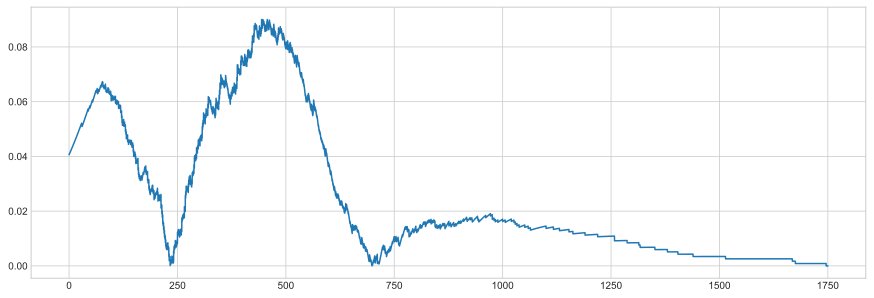

In [961]:
ox = np.linspace(0, 1750, 10000)
oy = np.array([np.abs(edf(x) - cdf(x)) for x in ox])

plt.figure(figsize=(15, 5))
plt.plot(ox, oy)

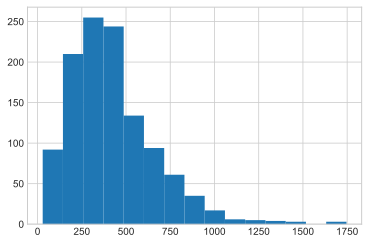

In [962]:
df['child_TNW'].hist(bins=15)

Максимум разницы:

In [963]:
x_max = 0
y_max = 0

for x, y in zip(ox, oy):
    if y > y_max:
        x_max = x
        y_max = y
        
x_max, y_max

(457.1457145714572, 0.09003545543238511)

Значение статистики Колмогорова:

In [964]:
D = y_max
D

0.09003545543238511

Критическое значение:

In [965]:
alpha = 0.05

stats.ksone.ppf(1 - alpha, n=n)

0.03574306638452909

Для данного уровня значимости гипотеза о нормальности распределения роста хоккеистов отвергается.

In [966]:
kstest = stats.kstest(rvs=df['child_TNW'], cdf=cdf, alternative='greater')
kstest

KstestResult(statistic=0.09027266705463943, pvalue=5.35035809830964e-09)

In [967]:
stats.ksone.ppf(1 - kstest.pvalue, n=n)

0.09027266707802611

__Гипотеза 1__

Предположим, что среднее значение слов в пересказе детей с SLD равно 3/4 среднего количества слов в пересказе детей без дефекта речи

Для случая неизвестной дисперсии мы получаем:
$$T = \dfrac{\overline{X} - a}{\sigma_X / \sqrt{n}},$$

Доверительный интервал:
$$
P \left( 
    \overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
    \leq a \leq
    \overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
\right) = p.
$$

$$a=442.5 * 2 / 3 = 295$$

$$T = \dfrac{\overline{X} - 331.8}{\sigma_X / \sqrt{10}},$$


n=267 => 267-1=266 степенней свободы

$\alpha = 0.01$. А квантиль тогда получается $t_{1 - 0.01/2}$.

In [971]:
alfa=0.01
t = stats.t.ppf(1-alfa/2,df = 266)
t

2.594438075227965

$$\Omega_\alpha = (-\infty;-2.5944)\cup(2.5944;+\infty).$$

In [972]:
n = child_TNW_1.shape[0]
mean = child_TNW_1.mean()
std = child_TNW_1.std(ddof=1)
n, mean, std

(267, 358.0674157303371, 243.354847710496)

In [973]:
T = (mean - 331.8)/(std/np.sqrt(n))
T

1.7637335507131795

In [974]:
(mean - t*std / np.sqrt(n), mean+t*std/np.sqrt(n))

(319.4282553644917, 396.70657609618246)

значение не попадает в критическую область, значит гипотеза не опровергнута

__Гипотеза 2__

Предположим, что чем больше эксперт поправляет ребёнка(чем больше эксперт говорит ему слов),тем больше ребёнок допускает ошибок, из-за того, что нервничает 

Рассмотрим отдельно эту зависимость для детей с дефектов и для детей без дефекта

голубой - дети с дефектом

оранджевый - без дефекта

Text(0, 0.5, 'замечания эксперта')

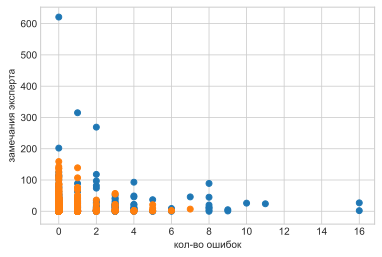

In [975]:
plt.scatter(df.loc[df["Y"]==1,"word_errors"],
           df.loc[df["Y"]==1,"examiner_TNW"])
plt.scatter(df.loc[df["Y"]==0,"word_errors"],
           df.loc[df["Y"]==0,"examiner_TNW"])
plt.xlabel('кол-во ошибок')
plt.ylabel('замечания эксперта')

In [976]:
df[['word_errors', 'examiner_TNW']].corr()

,word_errors,examiner_TNW
word_errors,1.000000,0.033129
examiner_TNW,0.033129,1.000000


Так же проверим зависимость этих двух величин, посчитаем несмещённую оценку
$$\sigma_{xy} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n (x_i - \overline{x}) \cdot (y_i - \overline{y})$$

In [977]:
Error = df.word_errors
Examiner = df["examiner_TNW"]
M_Error = Error.mean()
M_Examiner = Examiner.mean()
cov = ((Error - M_Error)*(Examiner - M_Examiner)).sum() / (Examiner.shape[0]-1)
cov

1.4696242283962038

У нас получилась положительная ковариаци, это говорит о том, что связь прямопропорциональна. Но по корреляции мы можем сделать вывод, что зависимость очень маленькая. Гипотеза опровергнута.

__Гипотеза 3__

Посмотрим, на сколько связаны кол-во слов паразитов и и кол-во повторений

In [978]:
df[['fillers', 'repetition']].corr()

,fillers,repetition
fillers,1.000000,0.299435
repetition,0.299435,1.000000


In [979]:
Fillers = df.fillers
Repetition = df["repetition"]
M_Fillers = Error.mean()
M_Repetition = Repetition.mean()
cov = ((Fillers - M_Fillers)*(Repetition - M_Repetition)).sum() / (Repetition.shape[0]-1)
cov

34.56464008595492

Связь есть, но не очень сильная, рассмотрим коэффициенты линейной регрессии:

In [980]:
x1 = df["fillers"]
y1 = df["repetition"]

In [981]:
x1 = df["fillers"]
y1 = df["mlu100_utts"]

In [982]:
b1 = ((x1 * y1).mean() - x1.mean() * y1.mean()) / ((x1 ** 2).mean() - x1.mean() ** 2)
b1

0.5219593221306821

In [983]:
b0 = y1.mean() - b1 * x1.mean()
b0

44.1723650750297

Модель линейной регрессии имеет вид:
$$𝑦=44.1723+0.52⋅𝑥$$

Text(0, 0.5, 'кол-во повторений')

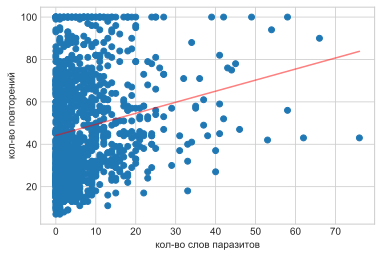

In [1022]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('кол-во слов паразитов')
plt.ylabel('кол-во повторений')

__Гипотеза 4__

Предскажем количество слов опираясь на среднее время произнесения первых 100 слов и показатель сложности предложения

In [985]:
x2 = df[['ipsyn_total', 'mlu100_utts']].values

y2 = df['child_TNW'].values.reshape(-1, 1)
y2

array([[287],
       [368],
       [266],
       ...,
       [337],
       [511],
       [495]], dtype=int64)

In [986]:
x2.shape

(1163, 2)

In [987]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [988]:
x2.shape

(1163, 3)

In [989]:
x2

array([[ 1., 60., 35.],
       [ 1., 62., 40.],
       [ 1., 64., 25.],
       ...,
       [ 1., 78., 28.],
       [ 1., 89., 44.],
       [ 1., 86., 50.]])

In [990]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

102960486626127.55

In [991]:
XTX

array([[1.163000e+03, 8.706900e+04, 5.564000e+04],
       [8.706900e+04, 6.841819e+06, 4.531084e+06],
       [5.564000e+04, 4.531084e+06, 3.349016e+06]])

In [992]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[-206.55020125]
 [   4.06431746]
 [   6.80197389]]


Итак, наша модель регрессии имеет вид:
$$y = 7.9404 - 1.0559 \cdot x_1 + 0.3556 \cdot x_2,$$
где $x_1$ — уровень языка, $x_2$ — время произнесения первых 100 слов.


In [993]:
z2 = x2.dot(b)

print(f'real: {y2[:6].T}')
print(f'pred: {z2[:6].T}')

real: [[287 368 266 405 300 224]]
pred: [[275.37793242 317.51643679 223.61546335 354.09529392 250.99202767
  227.84844957]]


In [994]:
R1 = z2.var() / y2.var()
R1

0.8379174454178387

Коэффициент детерминации, равный $0.8379$, означает, что $84 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $16 \%$ обусловлены какими-то ещё факторами, которые модель не учла.

Посчитаем среднюю ошибку аппроксимации

In [995]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [996]:
mean_approximation_error(y2, z2)

0.17279125475585239

Для первого примера имеем $k_1 = 2$, $k_2 = 1163 - 2 - 1 = 1160$. Посчитаем значение статистики $T$:

In [997]:
k1 = 2
k2 = 1160

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

2998.4233626820846

In [998]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.003482172639214

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

Предскажем тип ребёнка, опираясь на суммарное количество слов и соотношение глаголов, которые ребёнок не просклонял и просклонялок

In [1040]:
Y = df["Y"]
TNW = df[['child_TNW','r_2_i_verbs']].values

Text(0, 0.5, 'соотношение несклоняемых и склоняемых глаголов')

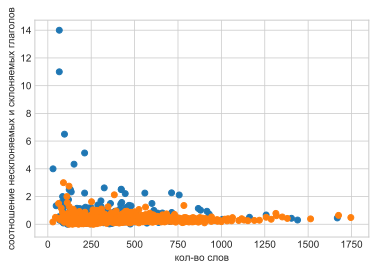

In [1041]:
plt.scatter(df.loc[df["Y"]==1,"child_TNW"],
           df.loc[df["Y"]==1,"r_2_i_verbs"])
plt.scatter(df.loc[df["Y"]==0,"child_TNW"],
           df.loc[df["Y"]==0,"r_2_i_verbs"])
plt.xlabel('кол-во слов')
plt.ylabel('соотношение несклоняемых и склоняемых глаголов')

Построим для данной задачи модель логистической регрессии методом градиентного спуска.

Добавим столбец «фиктивного» фактора:

In [1042]:
ones = np.ones((TNW.shape[0], 1))
TNW = np.hstack((ones, TNW))
TNW

array([[  1., 287.,   8.],
       [  1., 368.,  16.],
       [  1., 266.,   0.],
       ...,
       [  1., 337.,   0.],
       [  1., 511.,   0.],
       [  1., 495.,   0.]])

Нам понадобится метрика чтобы вычислять расстояние между соседними векторами параметров. Будем использовать евклидово расстояние.

In [1043]:
from scipy.spatial.distance import euclidean

Начальное приближение $b^{[0]}$ можно выбирать нулевым или произвольным. Будем также использовать коэффициент $\lambda_n = \dfrac{0.1}{n}$.

In [1044]:
def sigmoid(x: float) -> float:
    """Сигмоида.
    """
    
    return 1 / (1 + np.exp(-x))

In [1045]:
def partial_derivative(j: int, b: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """Частная производная функционала Q по переменной b_j.
    """
    
    return -sum(
        x[i, j] * y[i] * (1 - sigmoid(b.dot(x[i]) * y[i]))
        for i in range(x.shape[0])
    )

In [1046]:
def gradient(b: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Вектор градиента.
    """
    
    return np.array([
        partial_derivative(j, b, x, y)
        for j in range(b.shape[0])
    ])

In [1047]:
def gradient_descent_step(
        lambda_: float,
        b: np.ndarray,
        x: np.ndarray,
        y: np.ndarray,
) -> np.ndarray:
    """Один шаг градиентного спуска.
    """
    
    return b - lambda_ * gradient(b, x, y)

In [1048]:
b_0 = np.zeros(TNW.shape[1])

b = b_0

for i in range(1, 10 ** 6):
    lambda_ = 0.1 / i
    
    b_new = gradient_descent_step(lambda_, b, TNW, Y)
        
    if euclidean(b, b_new) < 10 ** (-5):
        print(f'success on step {i}\n')
        
        break
    
    b = b_new

b = b_new.reshape(-1, 1)

print(b)

success on step 2

[[  13.35]
 [4780.2 ]
 [  18.7 ]]


In [1049]:
from sklearn.linear_model import LogisticRegression

In [1050]:
model = LogisticRegression(solver='liblinear')

model.fit(TNW, Y)
b_ = model.coef_.flatten()

model.coef_, model.n_iter_

(array([[-0.48654817, -0.00140379,  0.49942931]]), array([11], dtype=int32))

Для подобранных параметров получаем вектор из предсказанных значений $z = \sigma(X \cdot b)$.

In [1051]:
z = TNW.dot(b)

z = np.array([sigmoid(z_i) for z_i in z])

print(z)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [1052]:
Y = np.array(df.Y)
Y_pred = np.array([
    1 if z_ == 1 else 0
    for z_ in z
])
print(f'y_real: {Y}')
print(f'y_pred: {Y_pred}')

y_real: [1 1 1 ... 0 0 0]
y_pred: [1 1 1 ... 1 1 1]


Попробуем визуализировать функционал, который мы пытаемся минимизировать. Поскольку переменных в нашем случае три, будем рисовать этот функционал в разрезе по первой переменной (т.е. для каждого фиксированного значения переменной $b_0$ будем рисовать двумерную поверхность относительно оставшихся переменных $b_1$, $b_2$).

In [1053]:
%config InlineBackend.figure_formats = ['svg'] # для отрисовки графиков в векторном формате

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [1054]:
Y_T = Y.reshape(-1, 1)  # нам понадобится именно столбец

def functional(b0: float, b1: float, b2: float) -> float:
    """Минимизируемый функционал для примера 3.
    """
    b = np.array([b0, b1, b2]).reshape(-1, 1)
    
    return (np.log(1 + np.exp(-TNW.dot(b) * Y_T))).sum()

In [ ]:
n_axes = 4
b0_options = [-100, -50, -10, b[0][0]]

fig, axes = plt.subplots(ncols=n_axes, nrows=1, subplot_kw={'projection': '3d'})
fig.set_size_inches(15, 3)

for ax, b0 in zip(axes, b0_options):
    foo = lambda b1, b2: functional(b0=b0, b1=b1, b2=b2)

    X1 = np.linspace(-10, 10, 100)
    Y1 = np.linspace(-10, 10, 100)

    Z = np.array([
        [
            foo(x_, y_)
            for y_ in Y1
        ]
        for x_ in X1
    ])
    
    X1, Y1 = np.meshgrid(X, Y1)
    
    ax.plot_surface(X1, Y1, Z)

    ax.set_xlabel('b1')
    ax.set_ylabel('b2')
    ax.set_zlabel('Z')
    
    Z_min = Z.min()
    where = np.where(Z == Z_min)
    X1_min = round(X1[where][0], 2)
    Y1_min = round(Y1[where][0], 2)
    Z_min = round(Z_min, 2)
    
    ax.set_title(f'b0 = {round(b0, 2)}\nz_min = {Z_min} в точке ({X1_min}, {Y1_min})')

    ax.view_init(0, -12)

In [1055]:
functional(*b), functional(*b_)

(621.059873781711, 890.0485618126224)